## Hugging Face

[Hugging Face](https://huggingface.co/) — это платформа и сообщество для разработки моделей машинного обучения в области обработки естественного языка (и не только) и обмена ими. Здесь можно найти готовые модели, узнать об их параметрах и применении, а также делиться своими разработками и идеями с другими специалистами.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/huggingface.png" width="700"></center>

Можно выделить 4 основные составляющие:
*   Токенизаторы
*   Модели
*   Датасеты
*   Обучение

### Pipeline

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/full_nlp_pipeline.png" width="900"></center>

<center><em>Source: <a href="https://huggingface.co/learn/nlp-course/chapter2/2?fw=pt">Hugging Face NLP course</a></em></center>

Наиболее простой способ работать с Hugging Face — использовать обёртку *pipeline*, которая включает в себя токенизацию, обработку токенов моделью и постобработку результата работы модели — перевод в человекочитаемое представление.

Вариантов базовых pipeline'ов множество, вот часть из них:
* feature-extraction (get the vector representation of a text)
* fill-mask
* ner (named entity recognition)
* question-answering
* summarization
* text-generation
* translation
* zero-shot-classification

Рассмотрим несколько наиболее распространённых задач.

**Sentiment Analysis**

С задачей оценки эмоциального окраса предложений мы познакомились в конце прошлой лекции.

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier("MSU AI is an amaizing course")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9802750945091248}]

**Zero-shot classification**

Zero-Shot Learning — это сценарий машинного обучения, в котором модель  обучается распознавать и классифицировать объекты без предварительного обучения на каких-либо примерах из этих категорий.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/zero_shot_learning.jpg" width="700"></center>

<center><em>Source: <a href="https://saturncloud.io/blog/breaking-the-data-barrier-how-zero-shot-one-shot-and-few-shot-learning-are-transforming-machine-learning/">Zero-Shot Learning</a></em></center>

In [ ]:
classifier = pipeline("zero-shot-classification")

classifier(
    "This is a chapter about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


{'sequence': 'This is a chapter about the Transformers library',
 'labels': ['business', 'education', 'politics'],
 'scores': [0.40918147563934326, 0.407565176486969, 0.18325327336788177]}

***Генерация текста*** выглядит аналогично. Для выбора конкретной модели используется параметр `model`.

In [ ]:
generator = pipeline("text-generation", model="distilgpt2")

generator(
    "In this course, we will teach you how to", max_length=30, num_return_sequences=2
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to get through to our own unique mission. Please enter our email address in the fields below\n\n\n'},
 {'generated_text': 'In this course, we will teach you how to play a traditional roleplaying game that combines tactics of card game and combat. The content will contain an'}]

Следующий pipeline служит для заполнения пропусков `<mask>` в тексте и называется ***fill-mask***.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/fill_mask.png" width="600"></center>

In [ ]:
unmasker = pipeline("fill-mask")

unmasker(
    "This course will teach you all about <mask> models and <mask> learning.", top_k=2
)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


[[{'score': 0.12439923733472824,
   'token': 30412,
   'token_str': ' mathematical',
   'sequence': '<s>This course will teach you all about mathematical models and<mask> learning.</s>'},
  {'score': 0.06296459585428238,
   'token': 774,
   'token_str': ' role',
   'sequence': '<s>This course will teach you all about role models and<mask> learning.</s>'}],
 [{'score': 0.2192085236310959,
   'token': 37700,
   'token_str': ' reinforcement',
   'sequence': '<s>This course will teach you all about<mask> models and reinforcement learning.</s>'},
  {'score': 0.14871057868003845,
   'token': 3563,
   'token_str': ' machine',
   'sequence': '<s>This course will teach you all about<mask> models and machine learning.</s>'}]]

Важной задачей является разметка текстов, в частности, выделение именованных сущностей (**Named Entity Recognition**, ***NER***):

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/ner.png" width="800"></center>

In [ ]:
ner = pipeline("ner", aggregation_strategy="simple")

ner("My name is Alexander and I work at MSU.AI in Moscow.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


[{'entity_group': 'PER',
  'score': np.float32(0.9990042),
  'word': 'Alexander',
  'start': 11,
  'end': 20},
 {'entity_group': 'ORG',
  'score': np.float32(0.9947736),
  'word': 'MSU',
  'start': 35,
  'end': 38},
 {'entity_group': 'ORG',
  'score': np.float32(0.9969048),
  'word': 'AI',
  'start': 39,
  'end': 41},
 {'entity_group': 'LOC',
  'score': np.float32(0.99926883),
  'word': 'Moscow',
  'start': 45,
  'end': 51}]

Закончим с примерами задачей ***Question Answering, QA***.

В данном случае ответ не генерируется, а **извлекается** (extract) из контекста. Контекст не может быть пустым.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/qa_example.png" width="500"></center>

<center><em>Source: <a href="https://www.deleeuw.me.uk/posts/Using-PrimeQA-For-NLP-Question-Answering/">Using PrimeQA For NLP Question Answering</a></em></center>

In [ ]:
question_answerer = pipeline("question-answering")

question_answerer(
    question="Where do I work?",
    context="My name is Alexander and I work at MSU.AI in Moscow.",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.4669005572795868,
 'start': 35,
 'end': 51,
 'answer': 'MSU.AI in Moscow'}

## Архитектура сети Transformer

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/transformer_architecture.png" width="450"></center>

<center><em>Архитектура трансформера</em></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1706.03762.pdf"> Attention Is All You Need</a></em></center>

## Encoder

### Алгоритм

<div align="center">
    <table >
     <tr>
       <td>

Порядок вычислений трансформера-кодировщика:

1. Добавляются позиционные векторы $p_i$:

$\qquad \large h_i = x_i + p_i;$

$\qquad \large H = (h_1, \dots, h_n).$

$\qquad$ Размерность: $dim \ x_i, \ p_i, \ h_i = 512, \ dim \ H = 512 \times n$

2. Многомерное самовнимание:

$\qquad \large h^j_i = \text{Attn}(\color{red}{W^j_q}h_i, \color{red}{W^j_k}H, \color{red}{W^j_v}H).$

$\qquad$ Размерность: $j = 1, \dots, J=8, \ dim \ h^j_i = 64, \ dim \ W^j_q, \ W^j_k, \ W^j_k = 64 \times 512 $

3. Конкатенация:

$\qquad \large h'_i =  MH_j (h^j_i) \equiv [h^1_i, \dots, h^J_i].$

$\qquad$ Размерность: $dim \ h'_i = 512$

4. Сквозная связка + нормировка уровня:

$\qquad \large h''_i =  LN(h'_i + h_i; \color{red}{\mu_1, \sigma_1}).$

$\qquad$ Размерность: $dim \ h''_i, \ \mu_1, \ \sigma_1 = 512$

5. Полносвязная 2-хслойная сеть FFN:

$\qquad \large h'''_i = \color{red}{W_2}\text{ReLU}(\color{red}{W_1}h''_i + \color{red}{b_1}) + \color{red}{b_2}.$

$\qquad$ Размерность: $dim \ W_1 = 2048\times512, \ dim \ W_2 = 512\times2048$

6. Сквозная связь + нормировка уровня:

$\qquad \large z_i = LN(h'''_i + h''_i; \color{red}{\mu_2, \sigma_2}).$

$\qquad$ Размерность: $dim \ z_i, \ \mu_2, \ \sigma_2 = 512$
       </td>
        <td>
<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/transformer_encoder.png" width="200"></center>

<em>Архитектура трансформера-кодировщика</em>

<em>Source: <a href="http://www.machinelearning.ru/wiki/images/1/19/Voron-ML-Attention-slides.pdf"> К.В. Воронцов, Машинное обучение: Обработка

последовательностей и модели внимания</a></em>
        </td>
     </tr>
    </table>
    </div>

В качестве слоя нормировки используется LayerNorm, которая рассчитывает статистики не по объектам в батче, а по каждому признаку каждого объекта независимо.



**Layer Normalization**

$\qquad  \large x_i, \ \color{red}{\mu}, \ \color{red}{\sigma} \in \mathbb{R};$

$\qquad  \large \displaystyle LN_s(x; \color{red}{\mu}, \ \color{red}{\sigma}) = \color{red}{\sigma_s} {{x_s - \overline x} \over \sigma_x} + \color{red}{\mu_s}, \ s = 1, \dots, d;$

$\qquad \displaystyle \overline x = {1 \over d} \sum\limits_{s}x_s$ и $\displaystyle \sigma^2_x = {1 \over d} \sum\limits_{s}(x_s - \overline x)^2$ — среднее и дисперсия $x$.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/visualization_of_layer_normalization.png" width="450"></center>

<center><em>Source: <a href="https://paperswithcode.com/method/layer-normalization">Layer Normalization</a></em></center>

##BERT

[Оригинальная статья](https://arxiv.org/abs/1810.04805)

### Постановка задачи

Модель решает две задачи.

1. MLM (masked language model) — предсказание маскированных токенов. Для этой задачи появляется специальный токен **[MASK]**.

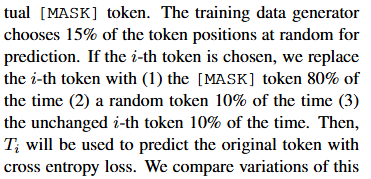

2. NSP (Next Sentence Prediction) — предсказание, следует ли текущее предложение за предыдущим. Для этого появляются специальные токены [CLS] (для классификации) и [SEP] (для разделения предложений, которые подаются парой и следуют друг за другом).

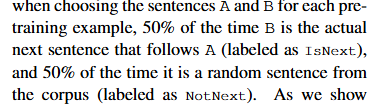

Сеть училась на обеих задачах одновременно.

Для предсказания замаскированного токена используется дополнительный слой — классификатор. Аналогично, для решения задачи NSP выход токена [CLS] отправляется на полносвязную сеть.

**BERT — фактически encoder-only модель**

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/bert.png" width="600"></center>

Помимо обычных и позиционных эмбеддингов, добавилис sentence-эмбеддинги

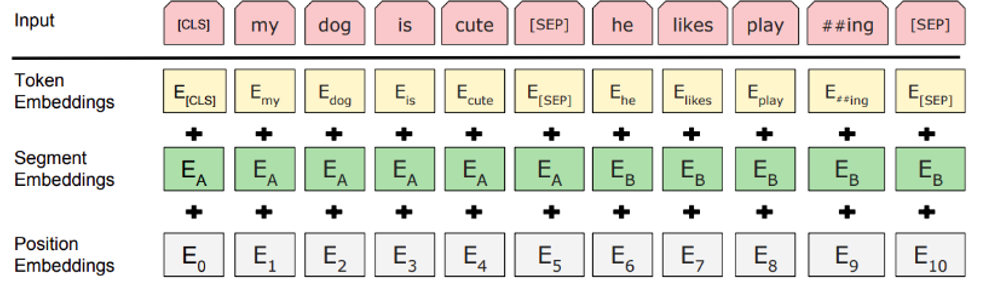

Благодаря процедуре маскирования, BERT-подобные модели могут обучаться без учителя на огромных корпусах текстов, тем самым изучая стуктуру языка.

Далее предобученные BERT-подобные модели можно использовать так:

* использовать их выходы как признаки для других моделей (**downstream-задачи**);

* дообучать под наши задачи.


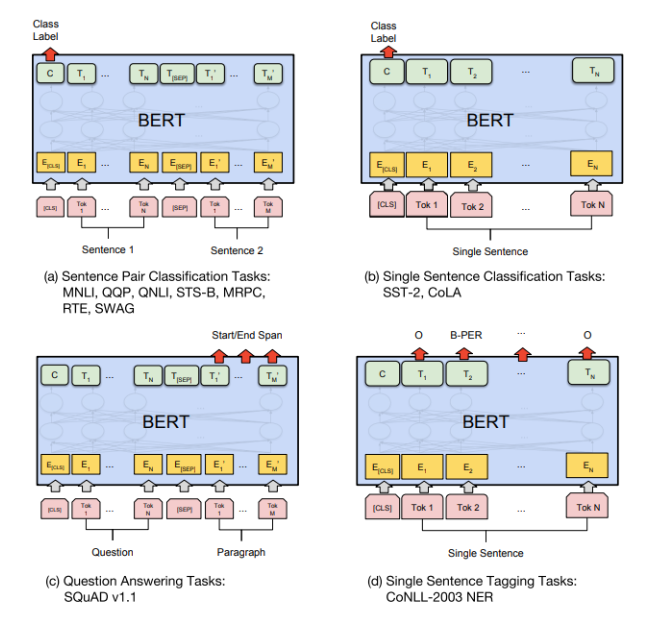

Качество на момент выхода статьи:

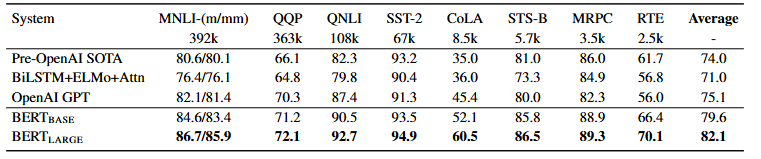

[Illustrated BERT](https://jalammar.github.io/illustrated-bert/)

BERT был представлен в двух вариантах:

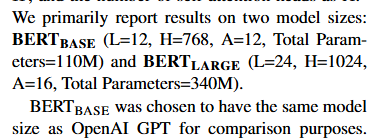

### 50 оттенков BERT-моделей

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/bert.png" width="700"></center>

<center><em>Source: <a href="https://naviglinlp.blogspot.com/2021/05/lecture-22-215-hours-bert-glue-and.html">BERT. RoBERTa. XLM-R.</a></em></center>

#### RoBERTa

[Оригинальная статья](https://arxiv.org/abs/1907.11692)

RoBERTa — это простая, но очень популярная альтернатива и преемник BERT. Она улучшает BERT за счет тщательной и разумной оптимизации обучающих гиперпараметров для BERT. Несколько простых изменений в совокупности повышают производительность RoBERTa и позволяют ей превзойти BERT практически во всех задачах.

* Увеличение датасета в 10 раз.
* Увеличение батча от 256 до 8000 и больший словарь — от 30k до 50k.
* Более длинные обучающие последовательности, но RoBERTa по-прежнему имеет ограничение на максимальное количество токенов — 512, как и у BERT.
* Динамическое маскирование позволяет маскирующей схеме меняться при каждой подаче последовательности на модель. Отличие от BERT в том, что везде используется одна и та же маскирующая схема.


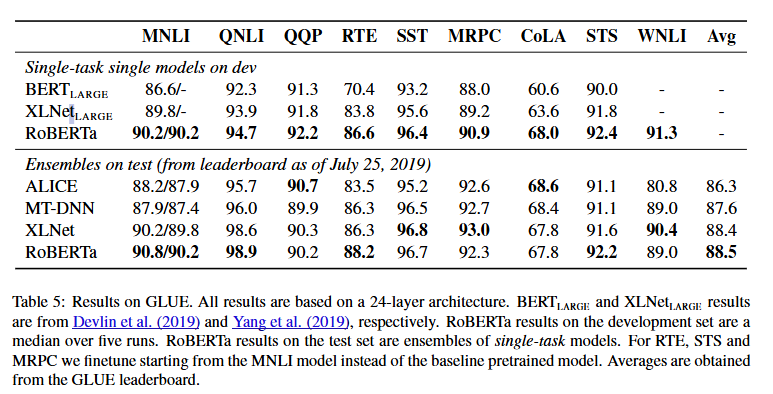

#### DistilBERT

[Оригинальная статья](https://arxiv.org/abs/1910.01108)



Использует почти ту же архитектуру, что и BERT, но только с 6 блоками энкодера (в base BERT их 12). Эти блоки инициализируются простым взятием одного из каждых двух предобученных блоков энкодеров BERT.

В отличие от BERT, DistilBERT предобучается только через моделирование языка по маске (оставили MLM и убрали Next Sentence Prediction). DistilBERT обучается с использованием тройного лосса:

- Тот же лосс языковой модели, что и в BERT;

- Лосс дистилляции измеряет сходство выходов между DistilBERT и BERT;

- Лосс косинусового расстояния измеряет, насколько похожи скрытые состояния DistilBERT и BERT.

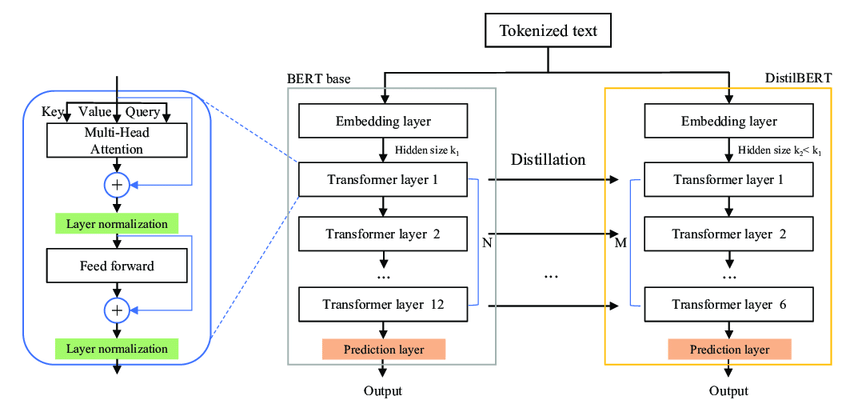

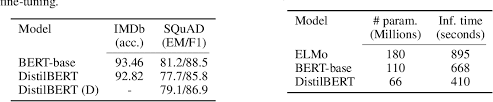

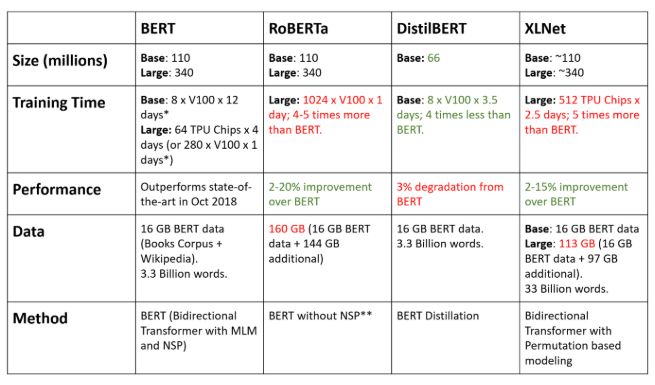

#### ALBERT

[Оригинальная статья](https://arxiv.org/abs/1909.11942)

ALBERT был представлен примерно в то же время, что и DistilBERT. Как и DistilBERT, ALBERT уменьшает размер модели BERT (в 18 раз меньше параметров), а также обучается в 1,7 раза быстрее. Но в отличие от DistilBERT, у ALBERT нет компромисса производительности (у DistilBERT он есть, хоть и небольшой). Это происходит из-за разницы в том, как структурированы эксперименты DistilBERT и ALBERT. Первый подготовлен так, чтобы использовать BERT в качестве учителя для процесса обучения/дистилляции. Второй, как и BERT, обучается с нуля. Более того, ALBERT превосходит все предыдущие модели, включая BERT, RoBERTa, DistilBERT.

С помощью этих методов уменьшения параметров, ALBERT достигает результатов с меньшей архитектурой модели:

* Факторизованная параметризация эмбеддинга. Чтобы размер скрытых слоев и размерность эмбеддинга были разными, ALBERT деконструирует матрицу эмбеддинга на 2 части. Это увеличивает размер скрытого слоя, не меняя фактического размера эмбеддинга. После разложения матрицы, ALBERT добавляет линейный или полносвязный слой после завершения фазы эмбеддинга. Это гарантирует, что размерность размерности эмбеддинга будет такой же.

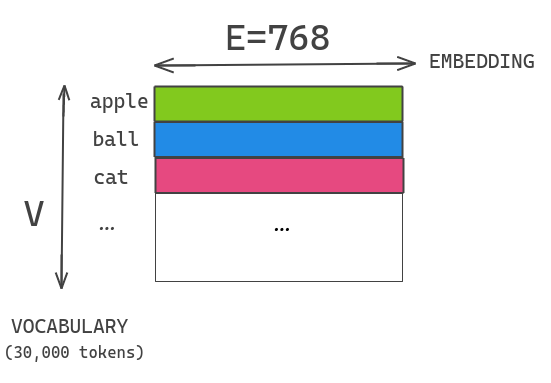

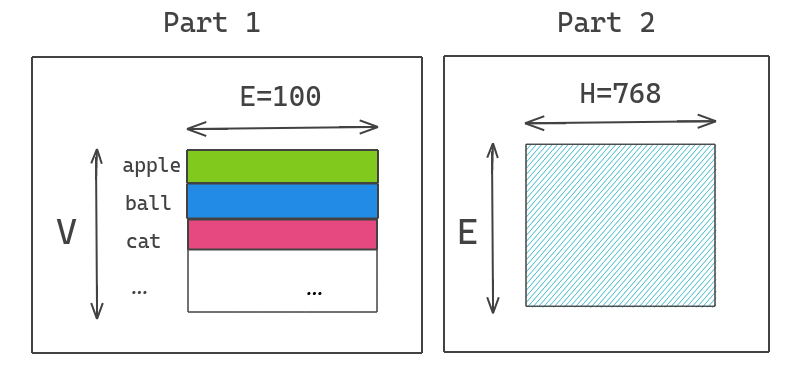

* Межслойное совместное использование параметров. Напомним, что BERT и ALBERT имеют по 12 блоков кодирования. В ALBERT эти блоки совместно используют все параметры. Это уменьшает размер параметров в 12 раз, а также увеличивает регуляризацию модели.


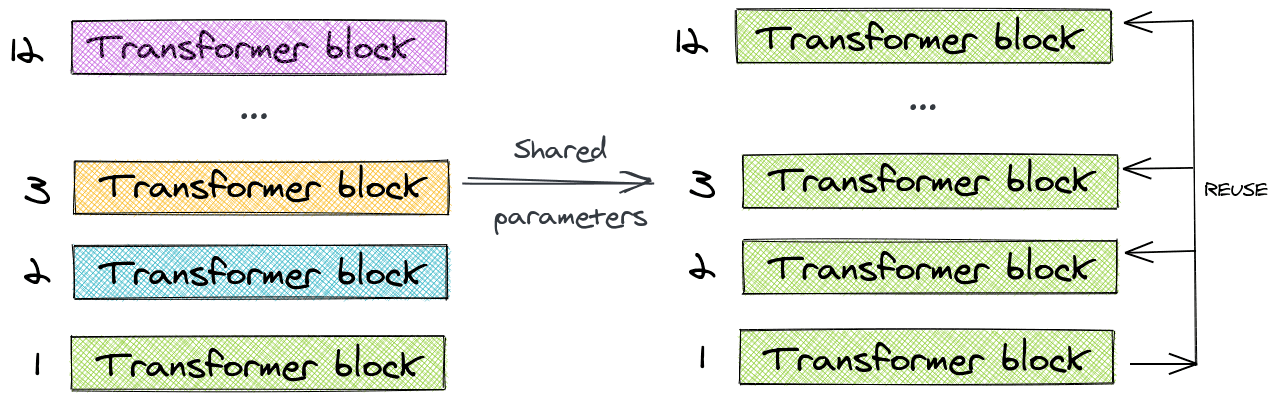

А еще есть свежие [ModernBERT](https://arxiv.org/abs/2412.13663) и [NeoBERT](https://arxiv.org/abs/2502.19587), но их обсудим чуть позже

### Примеры применения

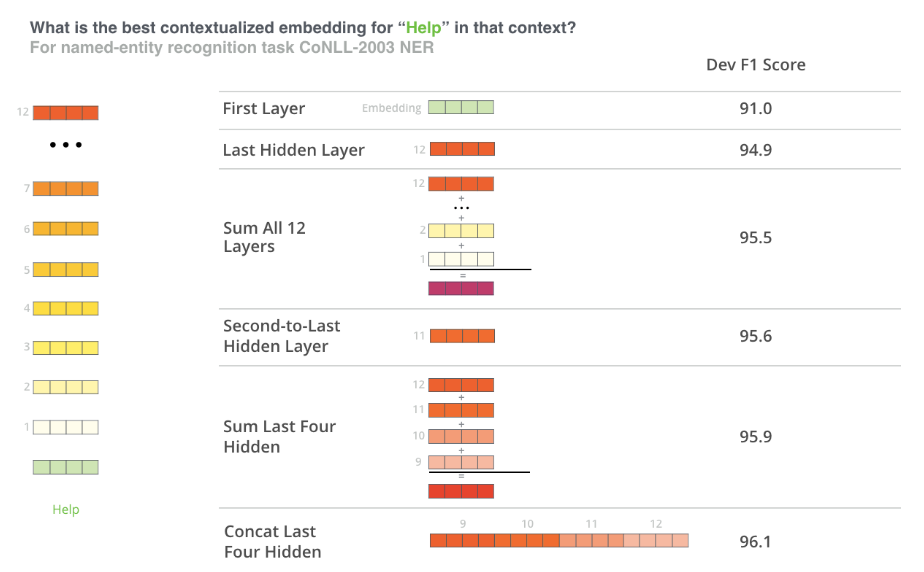

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel


tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")


def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

tokenizer_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

In [ ]:
print("BERT output shape:", embed_bert_cls("Привет мир", model, tokenizer).shape)

BERT output shape: (312,)


У такого подхода есть минус. Нам необходимо разбираться с тем, как выглядит выход модели. Обычно это словарь, по одному из ключей которого находится нужный нам вектор.

Можем попробовать иную форму запуска.

Теперь подадим 3 предложения и убедимся, что их векторы-представления совпадают по размеру.

In [ ]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer("cointegrated/rubert-tiny2")
sentences = ["привет мир", "hello world", "предложение подлиннее для проверки"]
embeddings = model.encode(sentences)

print("BERT output shape:", embeddings.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT output shape: (3, 312)


Самый простой способ использовать готовые модели — импортировать [pipeline 🛠️[doc]](https://huggingface.co/docs/transformers/main_classes/pipelines).

Попробуем оценить сегодняшнюю погоду.

In [ ]:
from transformers import pipeline

classifier = pipeline(
    task="sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment"
)
type(classifier)

config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
classifier("Отличное морозное утро!")

[{'label': 'POSITIVE', 'score': 0.9534334540367126}]

In [ ]:
classifier("Отличное морозное утро, холод собачий!")

[{'label': 'NEGATIVE', 'score': 0.7517327070236206}]

## Decoder

### Алгоритм

<div align="center">
    <table >
     <tr>
       <td>
       
Авторегрессионный синтез последовательности:

$\large y_0 = \langle {BOS} \rangle$ — эмбеддинг символа начала.

Для всех $t = 1, 2, \dots$ выполняется следующая последовательность вычислений:

1. Маскирование "данных из будущего":

$\qquad \large h_t = y_{t-1} + p_t;$

$\qquad \large H_t = (h_1, \dots, h_t).$

2. Многомерное самовнимание:

$\qquad \large h'_t = LN \circ MH_j \circ \text{Attn}(\color{red}{W^j_q}h_t, \color{red}{W^j_k}H_t, \color{red}{W^j_v}H_t).$

3. Многомерное внимание на кодировку $Z$:

$\qquad \large h''_t = LN \circ MH_j \circ \text{Attn}(\color{red}{W^j_q}h'_t, \color{red}{W^j_k}Z, \color{red}{W^j_v}Z).$

4. Двухслойная полносвязная сеть:

$\qquad \large y_t = LN \circ FFN(h''_t).$

5. Линейный предсказывающий слой:

$\qquad \large p(\tilde w | t) \text{SoftMax}_{\tilde w}(\color{red}{W_y}y_t + b_y).$

Генерация $\tilde w_t = \text{argmax}(p(\tilde w | t))$ продолжается пока $\tilde w_t \neq \langle {EOS} \rangle$.

       
</td>
<td>
<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L10/out/transformer_decoder.png" width="350">

<em>Архитектура трансформера-декодировщика</em>

<em>Source: <a href="http://www.machinelearning.ru/wiki/images/1/19/Voron-ML-Attention-slides.pdf"> К.В. Воронцов, Машинное обучение:

Обработка последовательностей и модели внимания</a></em>
        </td>
     </tr>
    </table>
    </div>

### Masked Self-Attention Layer

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/masked_self_attention.png" width="600"></center>

<center><em>Source: <a href="https://habr.com/ru/articles/490842/">GPT-2 в картинках</a></em></center>

Ключевой идеей декодировщика является **маскированное самовнимание**.

Решаемая проблема заключается в том, что мы не должны видеть часть слов в предложении. Например,
мы хотим сгенерировать фразу на основе только первого слова.

Если мы подадим в нейронную сеть во время обучения сразу все предложение, которое хотим генерировать, то у нас в первых словах будет "протекать" информация о предыдущих.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/gpt_decoder.png" width="700"></center>

<center><em>Source: <a href="https://habr.com/ru/articles/490842/">GPT-2 в картинках</a></em></center>

Благодаря этому трюку у нас получается обучать transfomer по-прежнему как простую single-pass нейросеть, а не "скатываться" в RNN, где у нас возникнут проблемы с градиентами и временем работы.

## GPT

### Постановка задачи

Есть широкий класс задач по пониманию естественного языка (распознавание текста, ответы на вопросы и пр.). Гипотеза состояла в том, чтобы добиться успеха путём генеративной предварительной подготовки языковой модели на разнообразном корпусе неразмеченного текста с последующей дискриминационной тонкой настройкой для каждой конкретной задачи.

Для решения задачи обучения без учителя вводился Masked Self-Attention.

**GPT — фактически decoder-only модель.**

### Архитектура

При генерации продолжения текста с помощью GPT происходит следующее:

1. Входной текст токенизируется в последовательность чисел (токенов).
2. Список токенов проходит через Embedding layer (линейный слой) и преобразуется в список эмбеддингов.
3. К каждому эмбеддингу прибавляется **positional embedding**.
4. Список эмбеддингов проходит через несколько одинаковых блоков (Transformer Decoder Block).
5. После того, как список эмбеддингов пройдёт через последний блок, эмбеддинг, соответствующий последнему токену, матрично умножается на всё тот же входной, но уже транспонированный Embedding Layer, и после применения SoftMax получается распределение вероятностей следующего токена.
6. Из этого распределения выбирается следующий токен (например, с помощью argmax).
7. Полученный токен добавляется к входному списку токенов, шаги 1–6 повторяются.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/L10/gpt3.gif" width="800"></center>

<center><em>Source: <a href="https://jalammar.github.io/how-gpt3-works-visualizations-animations/">How GPT3 Works — Visualizations and Animations</a></em></center>

### Эволюция

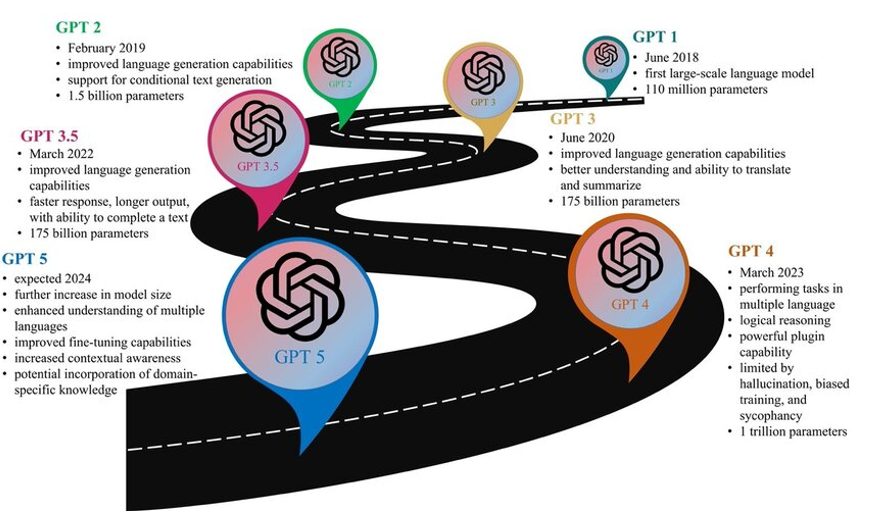

#### GPT 1 & 2

Первая была обучена в 2018 году на 7000 книг и имела размер контекста в 512 токенов. И она сразу получилась довольно сильной: после дообучения на специализированные задачи (бенчмарки) показывала на них лучшее на то время качество.

Так, в задачах CoLA (бенчмарк классификационный, в нём надо определить грамматическую корректность предложения) результат вырос до 45,4 против прежнего результата в 35,0 у RNN. А в GLUE — с 72,8 до 68,9.

Вторая модель была обучена в 2019 году. Она состояла из рекордных для того времени 1,5 млрд параметров (то есть была в ~10 раз больше первой), имела контекст в 1024 токена и была обучена на 40 ГБ текстовых данных. GPT-2 снова побеждала предыдущие подходы, включая GPT-1, на многих бенчмарках.

По сравнению с первой версией модели у второй произошел качественный рост: теперь она могла генерировать разумные тексты — а не только предложения. Правда, не всегда и не с первой попытки.

#### GPT 3

GPT-3 стала революцией с точки зрения качества и размеров. В 2020 году была получена модель размером в 175 млрд параметров, она обучалась на 570 ГБ текстовых данных с контекстом в 2048 токенов. Модель могла решать целый спектр задач, включая перевод, суммаризацию и ответы на вопросы, с качеством, близким к человеческому уровню, а также отличалась высокой способностью генерировать креативный контент. Демонстрацию работы модели лучше посмотреть в этой статье на 28 странице и далее.

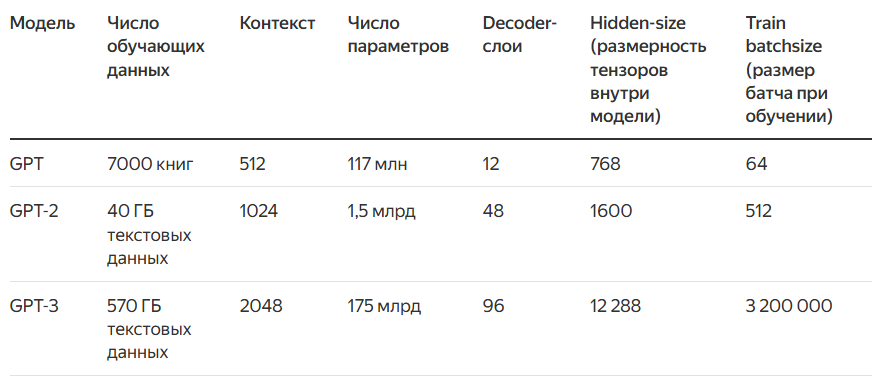

И есть еще следующие версии, а также другие интересные генеративные модели, которые мы тоже обсудим чуть позже

### Пример применения

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "sberbank-ai/rugpt3large_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.14G [00:00<?, ?B/s]

In [ ]:
text = "Вопрос: 'Сколько будет 2+2?'\nОтвет:"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
out = model.generate(input_ids, do_sample=False, max_length=20, pad_token_id=20)

generated_text = list(map(tokenizer.decode, out))[0]

print(generated_text)

Вопрос: 'Сколько будет 2+2?'
Ответ: '2+2=4'


Похожим способом можно кратко пересказывать тексты, если в конце дописывать `«TL:DR»`, т.к. модель во время обучения запомнила, что после этих символов идёт краткое содержание. Подбор модификаций текста называется **«Prompt Engineering»**. Такая простая идея позволяет решать практически неограниченное количество задач. Именно поэтому многие считают GPT-3 подобием сильного искусственного интеллекта.